In [1]:
from importlib.resources import files
from Consensus import *

In [2]:
EXAMPLE_TREES_PATH = files("Consensus.example_data").joinpath("GTRgamma_edit.nex")
EXAMPLE_ASTRAL_TREE_PATH = files("Consensus.example_data").joinpath("astral_GTRgamma.tre")

In [3]:
from Consensus import *
import ete3
import dendropy

In [4]:
input_trees = TreeList_with_support.get(path = EXAMPLE_TREES_PATH, schema = "nexus")
majority = input_trees.majority_rule_consensus()
majority.compute_branch_support(treelist=input_trees)
majority.compute_transfer_support(treelist=input_trees)

In [5]:
for edge in majority.postorder_edge_iter():
    edge.branch_support = None
    edge.annotations.add_bound_attribute("branch_support")
    edge.transfer_support = None
    edge.annotations.add_bound_attribute("transfer_support")
for edge in majority.postorder_edge_iter():
    edge.branch_support = majority.branch_support[int(edge.bipartition)]
    edge.transfer_support = majority.transfer_support[int(edge.bipartition)]
    #print(majority.branch_support[0x32901e480])

## outputの確認

In [6]:
majority.write(
        path='trees.xml',
        schema='nexml',
        ignore_unrecognized_keyword_arguments=False,
        )

## 再度木の読み込み〜描画まで

In [7]:
newtree = dendropy.Tree.get(path="trees.xml",schema="nexml")
print(newtree.as_string(schema='nexml'))

<?xml version="1.0" encoding="ISO-8859-1"?>
<nex:nexml
    version="0.9"
    xsi:schemaLocation="http://www.nexml.org/2009 ../xsd/nexml.xsd"
    xmlns:dendropy="http://pypi.org/project/DendroPy/"
    xmlns="http://www.nexml.org/2009"
    xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
    xmlns:xml="http://www.w3.org/XML/1998/namespace"
    xmlns:nex="http://www.nexml.org/2009"
    xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
>
    <otus id="d0">
        <otu id="d1" label="S1" />
        <otu id="d2" label="S2" />
        <otu id="d3" label="S3" />
        <otu id="d4" label="S4" />
        <otu id="d5" label="S5" />
        <otu id="d6" label="S6" />
        <otu id="d7" label="S7" />
        <otu id="d8" label="S8" />
        <otu id="d9" label="S9" />
        <otu id="d10" label="S10" />
        <otu id="d11" label="S11" />
        <otu id="d12" label="S12" />
        <otu id="d13" label="S13" />
        <otu id="d14" label="S14" />
        <otu id="d15" label="S15" />
     

In [8]:
majority2 = Tree_with_support(newtree)

In [31]:
branch_support = dict()
transfer_support = dict()
newtree.encode_bipartitions()
#あんま綺麗じゃないけど...
for edge in newtree.postorder_edge_iter():
    branch_support[int(edge.bipartition)] = float(str(edge.annotations.find(name="branch_support")).strip("branch_support=").strip("'"))
    transfer_support[int(edge.bipartition)] = float(str(edge.annotations.find(name="transfer_support")).strip("transfer_support=").strip("'"))

majority2.branch_support = branch_support
majority2.transfer_support = transfer_support

In [32]:
print(branch_support)

{1267650600228229401496703205374: 1.0, 2: 1.0, 4: 1.0, 64: 1.0, 128: 1.0, 1024: 1.0, 2048: 1.0, 3072: 0.989, 256: 1.0, 512: 1.0, 768: 0.885, 3840: 0.828, 8: 1.0, 16: 1.0, 32: 1.0, 56: 0.844, 4088: 1.0, 17179869184: 1.0, 1237940039285380274899124224: 1.0, 2475880078570760549798248448: 1.0, 3713820117856140824697372672: 1.0, 34359738368: 1.0, 68719476736: 1.0, 549755813888: 1.0, 1099511627776: 1.0, 2199023255552: 1.0, 4398046511104: 1.0, 8796093022208: 1.0, 17592186044416: 1.0, 140737488355328: 1.0, 137438953472: 1.0, 274877906944: 1.0, 412316860416: 0.951, 1152921504606846976: 1.0, 2305843009213693952: 1.0, 4611686018427387904: 1.0, 9223372036854775808: 1.0, 18446744073709551616: 1.0, 36893488147419103232: 1.0, 73786976294838206464: 1.0, 147573952589676412928: 1.0, 293994983674745978880: 1.0, 295147905179352825856: 1.0, 590295810358705651712: 1.0, 1180591620717411303424: 1.0, 2361183241434822606848: 1.0, 4722366482869645213696: 1.0, 9444732965739290427392: 1.0, 18889465931478580854784: 

In [33]:
string=majority2.as_string(schema='newick',suppress_rooting=True)

In [34]:
t = ete3.Tree(string)
ts=ete3.TreeStyle()

In [35]:
color = ["#006BA4", "#FF800E", "#ABABAB", "#595959",
                 "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]
_ = get_support(t,majority2.taxon_namespace,majority2.branch_support,pos = 0,leaf_support = False)

ts.legend.add_face(ete3.TextFace("branch_support",fgcolor=color[0]), column=0)
_ = get_support(t,majority2.taxon_namespace,majority2.transfer_support,pos = 1,leaf_support = False)
ts.legend.add_face(ete3.TextFace("transfer_support",fgcolor=color[1]), column=0)

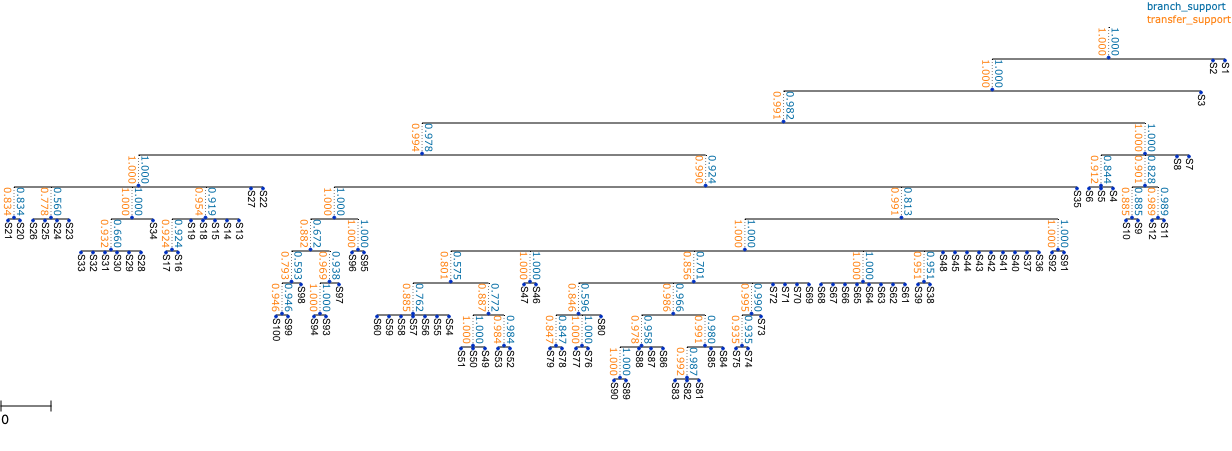

In [36]:
ts.rotation = 90
t.render(file_name="%%inline",tree_style=ts)